# Oral Insuline Phase II Physical Trial

## Introduction

The increasing prevalence of diabetes in the 21st century is a problem. Patients have symptoms like:

- unusual thirst
- frequent urination
= extreme fatigue

Diabetes can also lead to more serious complications like stroke, blindness, loss of limbs, kidney failure, and even heart attack.

## Discovery of Insulin

In the 1920s, insulin, was discovered by Frederick Banting. Most of the food we eat is turned to glucose, or sugar, for our bodies to use for energy. The pancreas, an organ near the stomach, makes a hormone called insulin, to help glucose get into the cells of our bodies. When you have diabetes, your body either doesn't make enough insulin or can't use its own insulin as well as it should. And this causes sugars to build-up in the blood.

With Banting discovery of insulin, pharmaceutical companies began large-scale production of insulin. Although it doesn't cure diabetes, it's one of the biggest discoveries in medicine. When it came, it was like a miracle.

## Challenges with Insulin

The default method of administration is by a needle, multiple times a day. Insulin pumps are a more recent invention. These are insulin delivering devices that are semi-permanently connected to a diabetics body.

## The Future: Oral Insulin?

Wouldn't it be great if diabetics could take insulin orally? This is an active area of research, but historically the roadblock is getting insulin through the stomach's thick lining.

## Our dataset: Auralin and Novodra Trials

We will be looking at the phase two clinical trial data of 350 patients for a new innovative oral insulin called Auralin - a proprietary capsule that can solve this stomach lining problem.

## Phase two trials are intended to:

- Test the efficacy and the dose response of a drug
= Identify adverse reactions

In this trial, half of the patients are being treated with Auralin, and the other 175 being treated with a popular injectable insulin called Novodra. By comparing key metrics between these two drugs, we can determine if Auralin is effective.

## Why do we need Data Cleaning?

Healthcare data is notorious for its errors and disorganization, and its clinical trial data is no exception. For example, human errors during the patient registration process means we can have:

- duplicate data
= missing data
- inaccurate data

I took the first step in fixing these issues by assessing this data sets quality and tidiness, and then cleaning all of these issues using Python and Pandas. My goal is to create a trustworthy analysis.

## DISCLAIMER: This Data Isn't "Real"

The Auralin and Novodra are not real insulin products. This clinical trial data was fabricated for the sake of this course. When assessing this data, the issues that you'll detect (and later clean) are meant to simulate real-world data quality and tidiness issues.

That said:

- This dataset was constructed with the consultation of real doctors to ensure plausibility.
= This clinical trial data for an alternative insulin was inspired and closely mimics this real clinical trial for a new inhaled insulin called Afrezza.
- The data quality issues in this dataset mimic real, common data quality issues in healthcare data. These issues impact quality of care, patient registration, and revenue.
- The patients in this dataset were created using this fake name generator and do not include real names, addresses, phone numbers, emails, etc.

## Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering the Data

### Patients Dataset

350 patients participated in this clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before. All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After four weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:

175 patients switched to Auralin for 24 weeks
175 patients continued using Novodra for 24 weeks

In [92]:
#Patients whose patient_id < 10

patients.loc[patients['patient_id'] < 10, "given_name"]

0       Zoe
1    Pamela
2       Jae
3      Liêm
4       Tim
5    Rafael
6      Mary
7    Xiuxiu
8     Dsvid
Name: given_name, dtype: object

In [4]:
#importing the table

patients = pd.read_csv('patients.csv')
patients

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


### patients columns:

- `patient_id: the unique identifier for each patient in the Master Patient Index (i.e. patient database) of the pharmaceutical company that is producing Auralin
- assigned_sex: the assigned sex of each patient at birth (male or female)
- given_name: the given name (i.e. first name) of each patient
= surname: the surname (i.e. last name) of each patient
- address: the main address for each patient
- city: the corresponding city for the main address of each patient
- state: the corresponding state for the main address of each patient
- zip_code: the corresponding zip code for the main address of each patient
- country: the corresponding country for the main address of each patient (all United states for this clinical trial)
- contact: phone number and email information for each patient
- birthdate: the date of birth of each patient (month/day/year). The inclusion criteria for this clinical trial is age >= 18 (there is no maximum age because diabetes is a growing problem among the elderly population)
- weight: the weight of each patient in pounds (lbs)
- height: the height of each patient in inches (in)
- bmi: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m2 where kg is a person's weight in kilograms and m2 is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. The inclusion criteria for this clinical trial is 16 >= BMI >= 38.

### Data Quality Issues

- treatments table missing hba1c changes.
- zip code is a float not a string zip code has four digits sometimes
- Tim Neudorf height is 27 in instead of 72 in
- full state names sometimes, abbreviations other times

### Treatments Dataset

In [6]:
# Importing the table

treatments = pd.read_csv('treatments.csv')
treatments

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36


### treatments columns:

- given_name: the given name of each patient in the Master Patient Index that took part in the clinical trial
- surname: the surname of each patient in the Master Patient Index that took part in the clinical trial
- auralin: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) and the ending median daily dose of -  - insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the international unit of measurement and the standard measurement for insulin.
- novodra: same as above, except for patients that continued treatment with Novodra
= hba1c_start: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The HbA1c test measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
- hba1c_end: the patient's HbA1c level at the end of the last week of treatment
- hba1c_change: the change in the patient's HbA1c level from the start of treatment to the end, i.e., hba1c_start - hba1c_end. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

### Quality Issues

- missing HbA1c changes
- the letter u in starting and ending doses for Auralin and Novodra
- lowercase given names and surnames
- missing records (280 instead of 350)

### Adverse Reaction Dataset

In [9]:
# importing the table

adverse_reactions = pd.read_csv('adverse_reactions.csv')
adverse_reactions.head()

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation


### adverse_reactions columns:

- given_name: the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- surname: the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- adverse_reaction: the adverse reaction reported by the patient

#### Additional useful information:

Insulin resistance varies person to person, which is why both starting median daily dose and ending median daily dose are required, i.e., to calculate change in dose.

It is important to test drugs and medical products in the people they are meant to help. People of different age, race, sex, and ethnic group must be included in clinical trials. This diversity is reflected in the patients table.
Ensuring column names are descriptive enough is an important step in acquainting yourself with the data. 'Descriptive enough' is subjective. Ideally you want short column names (so they are easier to type and read in code form) but also fully descriptive. Length vs. descriptiveness is a tradeoff and common debate (a similar debate exists for variable names). The auralin and novodra column names are probably not descriptive enough, but you'll address that later so don't worry about that for now.

### Data Quality Issues

#### patients table

- Zip code is a float not a string
- Zip code has four digits sometimes
- Tim Neudorf height is 27 in instead of 72 in
- Full state names sometimes, abbreviations other times
- Dsvid Gustafsson
- Missing demographic information (address - contact columns) (can't clean)
- Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns)
- Multiple phone number formats
- Default John Doe data
- Multiple records for Jakobsen, Gersten, Taylor
- kgs instead of lbs for Zaitseva weight

#### treatments table

- Missing HbA1c changes
- The letter 'u' in starting and ending doses for Auralin and Novodra
- Lowercase given names and surnames
- Missing records (280 instead of 350)
- Erroneous datatypes (auralin and novodra columns)
- Inaccurate HbA1c changes (leading 4s mistaken as 9s)
- Nulls represented as dashes (-) in auralin and novodra columns

#### adverse_reactions table

- Lowercase given names and surnames

### Data Tidiness Issues

- Contact column in patients table should be split into phone number and email
- Three variables in two columns in treatments table (treatment, start dose and end dose)
- Adverse reaction should be part of the treatments table
- Given name and surname columns in patients table duplicated in treatments and adverse_reactions tables

### Cleaning Data

In this section, I focused on the data quality and tidiness issues discussed earlier in the preceding section. No doubt, there are several ways to clean data manually using spreadsheet programs and text editors, however, the best way to clean data is to approach it programmatically. 

Manual Data Cleaning includes:

- Retyping incorrect data
- Copying and pasting columns and rows

However, manual cleaning is inefficient, error-prone, and demoralizing.
While Programmatic Data Cleaning uses code to:

- Automate cleaning tasks
- Minimize repetition
- Save time

Here, our focus is using the most reliable and error-free approach, programmatic, which requires three steps:

- Define - define how you will clean the issue in words
- Code - convert your definitions into executable code
- Test - test your data to ensure your code was implemented correctly



### Clinical Trial Dataset

In the clinical trial dataset, we identified three completeness issues:

- treatments table
- missing HbA1c changes
- missing records (280 instead of 350)

patients table

- Missing demographic information (address - contact columns)

Unfortunately, we can't do anything about the missing demographic information because we have no way of accessing that information until those patients come back.

In [ ]:
#importing the libraries

import pandas as pd

In [11]:
#Reading the dataset

adverse_reactions = pd.read_csv('adverse_reactions.csv')
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')

#Assessing the Dataset

patients.info()
treatments.info()
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype

In [12]:
#Checking for duplicate columns

all_columns = pd.Series(list(patients) + list(treatments) + list(adverse_reactions))
all_columns[all_columns.duplicated()]

14    given_name
15       surname
21    given_name
22       surname
dtype: object

In [17]:
#Listing all columns in patients dataset

list(patients)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'contact',
 'birthdate',
 'weight',
 'height',
 'bmi']

In [18]:
#checking for null values in 'patient['address'] column

patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


In [19]:
patients.describe()
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


In [21]:
#Check randomly for observations to be cleaned

patients.sample(5)

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
45,46,female,Liisa,Seppälä,1012 Lords Way,Adamsville,TN,38310.0,United States,LiisaSeppala@einrot.com1 731 632 2908,2/15/1930,157.7,63,27.9
317,318,female,Nancy,Parker,4605 Hall Street,Las Vegas,NV,89110.0,United States,NancyJParker@gustr.com+1 (702) 438-5138,3/21/1945,106.0,63,18.8
332,333,male,Abel,Efrem,2333 Hidden Pond Road,Old Hickory,TN,37138.0,United States,AbelEfrem@fleckens.hu1 615 755 8235,2/15/1971,224.0,67,35.1
286,287,male,Lewis,Webb,NaN,NaN,NaN,NaN,NaN,NaN,4/1/1979,155.3,68,23.6
84,85,female,Nương,Vũ,465 Southern Street,New York,NY,10001.0,United States,VuCamNuong@fleckens.hu516-720-5094,2/1/1981,138.2,63,24.5


In [33]:
#Count values in a column

patients.surname.value_counts()

Doe            6
Jakobsen       3
Taylor         3
Ogochukwu      2
Tucker         2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: surname, Length: 466, dtype: int64

<AxesSubplot:>

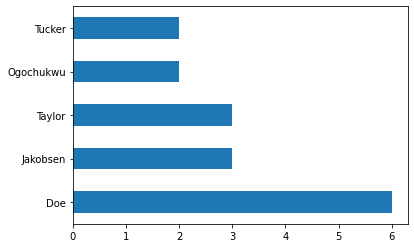

In [31]:
#Visual representation of the top 5 in surname column

patients.surname.value_counts().head().plot(kind = 'barh')

In [34]:
patients.address.value_counts()

123 Main Street             6
2778 North Avenue           2
2476 Fulton Street          2
648 Old Dear Lane           2
3094 Oral Lake Road         1
                           ..
1066 Goosetown Drive        1
4291 Patton Lane            1
4643 Reeves Street          1
174 Lost Creek Road         1
3652 Boone Crockett Lane    1
Name: address, Length: 483, dtype: int64

In [37]:
#Searching for duplicate values

patients[patients.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [38]:
#sorting values

patients.weight.sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

In [40]:
#Filter the patient table by the surname that is equal to Zaitseva and multiply the weight column by 2.20462

weight_lbs = patients[patients.surname == 'Zaitseva'].weight * 2.20462

#Test 

weight_lbs

210    107.585456
Name: weight, dtype: float64

In [41]:
height_in = patients[patients.surname == 'Zaitseva'].height
print(height_in)

210    63
Name: height, dtype: int64


In [42]:
bmi_check = 703 * weight_lbs / (height_in * height_in)
bmi_check

210    19.055827
dtype: float64

In [43]:
patients[patients.surname == 'Zaitseva'].bmi

210    19.1
Name: bmi, dtype: float64

In [50]:
#Checking for null values

sum(treatments.auralin.isnull())

sum(treatments.novodra.isnull())

0

### Data Cleaning

In [52]:
# Create a copy of the dataset

patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

#### Addressing Missing Data

In [54]:
##### treatments: Missing records (280 instead of 350)

# Import the cut treatments into a DataFrame and concatenate it with the original treatments DataFrame.

treatments_cut = pd.read_csv('treatments_cut.csv')
treatments_clean = pd.concat([treatments_clean, treatments_cut],
                             ignore_index=True)

treatments_clean.head()


,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [55]:
treatments_clean.tail()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN
349,armina,sauvé,36u - 46u,-,7.86,7.40,NaN


In [56]:
# treatments: Missing HbA1c changes and Inaccurate HbA1c changes (leading 4s mistaken as 9s)
# Note: the "Inaccurate HbA1c changes (leading 4s mistaken as 9s)" observation, which is an accuracy issue and not a completeness issue, is included in this header because it is also fixed by the cleaning operation that fixes the missing "Missing HbA1c changes" observation. Multiple observations in one Define, Code, and Test header occurs multiple times in this notebook.

# Recalculate the hba1c_change column: hba1c_start minus hba1c_end.

treatments_clean.hba1c_change = (treatments_clean.hba1c_start - 
                                 treatments_clean.hba1c_end)

treatments_clean.hba1c_change.head()

0    0.43
1    0.47
2    0.43
3    0.35
4    0.32
Name: hba1c_change, dtype: float64

#### Addressing Data Tidiness Issues

In [64]:
# Contact column in patients table contains two variables: phone number and email

# Extract the phone number and email variables from the contact column using regular expressions and pandas' str.extract method. Drop the contact column when done.

patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)

# [a-zA-Z] to signify emails in this dataset all start and end with letters
patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)

# Note: axis=1 denotes that we are referring to a column, not a row
patients_clean = patients_clean.drop('contact', axis=1)


# Confirm contact column is gone
list(patients_clean)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'birthdate',
 'weight',
 'height',
 'bmi',
 'phone_number',
 'email']

In [65]:
patients_clean.phone_number.sample(25)

431         510-376-3772
113         713 779 6516
35          718-501-0503
161         406-759-6160
103    +1 (407) 838-0201
289         504-441-7744
135         440-385-5011
445         408-792-9489
366         605-250-4942
311         601-389-7682
99          914-830-3940
285         580-991-9678
211         612 228 4170
120         415-676-8818
432         979 203 0438
491         210-222-8684
36          715-562-7013
312         323 280 6511
31          423-538-4887
203         636-442-6946
484         336-697-2005
140         217-421-0935
372         618-346-3914
85          407-662-9389
109         601-699-4153
Name: phone_number, dtype: object

In [66]:
# Confirm that no emails start with an integer (regex didn't match for this)
patients_clean.email.sort_values().head()

404               AaliyahRice@dayrep.com
11          Abdul-NurMummarIsa@rhyta.com
332                AbelEfrem@fleckens.hu
258              AbelYonatan@teleworm.us
305    AddolorataLombardi@jourrapide.com
Name: email, dtype: object

In [67]:
# Three variables in two columns in treatments table (treatment, start dose and end dose)

# Melt the auralin and novodra columns to a treatment and a dose column (dose will still contain both start and end dose at this point). Then split the dose column on ' - ' to obtain start_dose and end_dose columns. Drop the intermediate dose column.

treatments_clean = pd.melt(treatments_clean, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment', value_name='dose')
treatments_clean = treatments_clean[treatments_clean.dose != "-"]
treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ', 1).str
treatments_clean = treatments_clean.drop('dose', axis=1)

treatments_clean.head()

C:\Users\maxdr\AppData\Local\Temp\ipykernel_5256\1566520922.py:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ', 1).str


,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


In [68]:
# Adverse reaction should be part of the treatments table

# Merge the adverse_reaction column to the treatments table, joining on given name and surname.

treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean,
                            on=['given_name', 'surname'], how='left')

treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31u,38u,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u,NaN
...,...,...,...,...,...,...,...,...,...
625,christopher,woodward,7.51,7.06,0.45,novodra,55u,51u,nausea
626,maret,sultygov,7.67,7.30,0.37,novodra,26u,23u,NaN
627,lixue,hsueh,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort
628,jakob,jakobsen,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia


In [70]:
# Given name and surname columns in patients table duplicated in treatments and adverse_reactions tables and Lowercase given names and surnames

# Adverse reactions table is no longer needed so ignore that part. Isolate the patient ID and names in the patients table, then convert these names to lower case to join with treatments. Then drop the given name and surname columns in the treatments table (so these being lowercase isn't an issue anymore).

id_names = patients_clean[['patient_id', 'given_name', 'surname']]
id_names.given_name = id_names.given_name.str.lower()
id_names.surname = id_names.surname.str.lower()
treatments_clean = pd.merge(treatments_clean, id_names, on=['given_name', 'surname'])
treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)

# Confirm the merge was executed correctly
treatments_clean

C:\Users\maxdr\AppData\Local\Temp\ipykernel_5256\131955663.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_names.given_name = id_names.given_name.str.lower()
C:\Users\maxdr\AppData\Local\Temp\ipykernel_5256\131955663.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  id_names.surname = id_names.surname.str.lower()


,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,patient_id
0,7.63,7.20,0.43,auralin,41u,48u,NaN,225
1,7.97,7.62,0.35,auralin,33u,36u,NaN,242
2,7.65,7.27,0.38,auralin,37u,42u,NaN,345
3,7.89,7.55,0.34,auralin,31u,38u,NaN,276
4,7.76,7.37,0.39,auralin,30u,36u,NaN,15
...,...,...,...,...,...,...,...,...
624,7.68,7.21,0.47,novodra,42u,44u,injection site discomfort,477
625,7.68,7.21,0.47,novodra,42u,44u,injection site discomfort,477
626,7.68,7.21,0.47,novodra,42u,44u,injection site discomfort,477
627,7.68,7.21,0.47,novodra,42u,44u,injection site discomfort,477


In [71]:
# Patient ID should be the only duplicate column

all_columns = pd.Series(list(patients_clean) + list(treatments_clean))
all_columns[all_columns.duplicated()]

22    patient_id
dtype: object

#### Addressing Data Quality Issues

In [74]:
# Zip code is a float not a string and Zip code has four digits sometimes


# Convert the zip code column's data type from a float to a string using astype, remove the '.0' using string slicing, and pad four digit zip codes with a leading 0.

patients_clean.zip_code = patients_clean.zip_code.astype(str).str[:-2].str.pad(5, fillchar='0')
# Reconvert NaNs entries that were converted to '0000n' by code above
patients_clean.zip_code = patients_clean.zip_code.replace('0000n', np.nan)

patients_clean.zip_code.head()

0    92390
1    61812
2    68467
3    07095
4    36303
Name: zip_code, dtype: object

In [76]:
#Tim Neudorf height is 27 in instead of 72 in

#Replace height for rows in the patients table that have a height of 27 in (there is only one) with 72 in.

patients_clean.height = patients_clean.height.replace(27, 72)

# The height column should be empty

patients_clean[patients_clean.height == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


In [78]:
# Confirm the replacement worked

patients_clean[patients_clean.surname == 'Neudorf']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


In [79]:
#Full state names sometimes, abbreviations other times

#Apply a function that converts full state name to state abbreviation for California, New York, Illinois, Florida, and Nebraska.

# Mapping from full state name to abbreviation
state_abbrev = {'California': 'CA',
                'New York': 'NY',
                'Illinois': 'IL',
                'Florida': 'FL',
                'Nebraska': 'NE'}

# Function to apply
def abbreviate_state(patient):
    if patient['state'] in state_abbrev.keys():
        abbrev = state_abbrev[patient['state']]
        return abbrev
    else:
        return patient['state']
    
patients_clean['state'] = patients_clean.apply(abbreviate_state, axis=1)


patients_clean.state.value_counts()

CA    60
NY    47
TX    32
IL    24
FL    22
MA    22
PA    18
GA    15
OH    14
MI    13
OK    13
LA    13
NJ    12
VA    11
WI    10
MS    10
AL     9
TN     9
IN     9
MN     9
NC     8
KY     8
WA     8
MO     7
NE     6
KS     6
ID     6
NV     6
SC     5
IA     5
CT     5
RI     4
ND     4
AR     4
AZ     4
ME     4
CO     4
MD     3
DE     3
SD     3
WV     3
OR     3
VT     2
MT     2
DC     2
AK     1
NM     1
NH     1
WY     1
Name: state, dtype: int64

In [80]:
#Dsvid Gustafsson

#Replace given name for rows in the patients table that have a given name of 'Dsvid' with 'David'.

patients_clean.given_name = patients_clean.given_name.replace('Dsvid', 'David')


patients_clean[patients_clean.surname == 'Gustafsson']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
8,9,male,David,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,816-265-9578,DavidGustafsson@armyspy.com


In [81]:
#Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns) and Erroneous datatypes (auralin and novodra columns) and The letter 'u' in starting and ending doses for Auralin and Novodra

#Convert assigned sex and state to categorical data types. Zip code data type was already addressed above. Convert birthdate to datetime data type. Strip the letter 'u' in start dose and end dose and convert those columns to data type integer.

# To category
patients_clean.assigned_sex = patients_clean.assigned_sex.astype('category')
patients_clean.state = patients_clean.state.astype('category')

# To datetime
patients_clean.birthdate = pd.to_datetime(patients_clean.birthdate)

# Strip u and to integer
treatments_clean.dose_start = treatments_clean.dose_start.str.strip('u').astype(int)
treatments_clean.dose_end = treatments_clean.dose_end.str.strip('u').astype(int)

patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    category      
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       491 non-null    object        
 5   city          491 non-null    object        
 6   state         491 non-null    category      
 7   zip_code      491 non-null    object        
 8   country       491 non-null    object        
 9   birthdate     503 non-null    datetime64[ns]
 10  weight        503 non-null    float64       
 11  height        503 non-null    int64         
 12  bmi           503 non-null    float64       
 13  phone_number  491 non-null    object        
 14  email         491 non-null    object        
dtypes: category(2), datetime64[ns](1), float

In [82]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hba1c_start       629 non-null    float64
 1   hba1c_end         629 non-null    float64
 2   hba1c_change      629 non-null    float64
 3   treatment         629 non-null    object 
 4   dose_start        629 non-null    int32  
 5   dose_end          629 non-null    int32  
 6   adverse_reaction  67 non-null     object 
 7   patient_id        629 non-null    int64  
dtypes: float64(3), int32(2), int64(1), object(2)
memory usage: 39.3+ KB


In [83]:
#Multiple phone number formats

#Strip all " ", "-", "(", ")", and "+" and store each number without any formatting. Pad the phone number with a 1 if the length of the number is 10 digits (we want country code).

patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar='1')

patients_clean.phone_number.head()

C:\Users\maxdr\AppData\Local\Temp\ipykernel_5256\3483899154.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar='1')


0    19517199170
1    12175693204
2    14023636804
3    17326368246
4    13345157487
Name: phone_number, dtype: object

In [84]:
#Default John Doe data

#Remove the non-recoverable John Doe records from the patients table.

patients_clean = patients_clean[patients_clean.surname != 'Doe']

# Should be no Doe records
patients_clean.surname.value_counts()

Jakobsen       3
Taylor         3
Aranda         2
Tucker         2
Souza          2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: surname, Length: 465, dtype: int64

In [85]:
# Should be no 123 Main Street records
patients_clean.address.value_counts()

2778 North Avenue           2
2476 Fulton Street          2
648 Old Dear Lane           2
576 Brown Bear Drive        1
2272 Williams Avenue        1
                           ..
1066 Goosetown Drive        1
4291 Patton Lane            1
4643 Reeves Street          1
174 Lost Creek Road         1
3652 Boone Crockett Lane    1
Name: address, Length: 482, dtype: int64

In [86]:
# Multiple records for Jakobsen, Gersten, Taylor

# Remove the Jake Jakobsen, Pat Gersten, and Sandy Taylor rows from the patients table. These are the nicknames, which happen to also not be in the treatments table (removing the wrong name would create a consistency issue between the patients and treatments table). These are all the second occurrence of the duplicate. These are also the only occurences of non-null duplicate addresses.

# tilde means not: http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing
patients_clean = patients_clean[~((patients_clean.address.duplicated()) & patients_clean.address.notnull())]

patients_clean[patients_clean.surname == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,19792030438,KarenJakobsen@jourrapide.com


In [87]:
patients_clean[patients_clean.surname == 'Gersten']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [88]:
patients_clean[patients_clean.surname == 'Taylor']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,13054346299,RogelioJTaylor@teleworm.us


In [89]:
# kgs instead of lbs for Zaitseva weight

# Use advanced indexing to isolate the row where the surname is Zaitseva and convert the entry in its weight field from kg to lbs.

weight_kg = patients_clean.weight.min()
mask = patients_clean.surname == 'Zaitseva'
column_name = 'weight'
patients_clean.loc[mask, column_name] = weight_kg * 2.20462

# 48.8 shouldn't be the lowest anymore
patients_clean.weight.sort_values()

459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 494, dtype: float64

### Key Findings

#### Comparing Key Metrics

After assessing and cleaning the clinical trial data set we are ready to determine if the proposed new oral insulin, Auralin, compared to the injectable insulin Novodra.

#### Adverse Reactions

For Auralin to pass this Phase II clinical trial it must be deemed safe, and the adverse reactions to it is encouraging.

#### Adverse Reactions

treatment	adverse_reaction	
Auralin	cough	1
headache	1
hypoglycemia	10
nausea	1
throat irritation	2
Novodra	cough	1
headache	2
hypoglycemia	10
injection site discomfort	6
nausea	1
These adverse_reactions were actually previously standalone, but we joined this to the treatments table to allow for this analysis. Between the two drugs, Auralin and Novodra, the counts of each adverse reaction are pretty similar. One exception is throat irritation for Auralin, the oral insulin which is expected because this pill is taken orally and passes by the throat before it gets to the stomach. Another is injection site discomfort for Novodra which is the injectable insulin because that's a common known adverse reaction for injectable insulin because of needles. This one of the reasons why we want oral insulin in the first place.

These counts are more clear in these horizontal bar charts.

Adverse Reaction Count Bar Charts for Auralin and Novodra
Pre-trial Post-trial Mean Insulin Dose Change.
Dose change is important because if the new oral insulin requires a higher dosage to be effective, the manufacturer might not bring this to market because it wouldn't be financially feasible.

The dosage information was hidden in two columns in the treatments table, auralin and novodra, with start dose and end dose in each column, and the treatment value in each column header. We converted this to a tidy format and separated out the start_dose and end_dose by melting the treatment variable down to its own column. This allowed us to run a mean dose change analysis:

Mean Dosage Change
treatment	
Auralin	-8.325714
Novodra	0.377143Again, the results here are good for Auralin. Patients that were treated with Auralin required on average, 8 more units of insulin to establish a safe, steady blood sugar level compared to Novodra patients who on average required 0.4 units less of insulin. Auralin requiring 8 more units, is expected because we knew that oral insulin has a tougher time getting into the bloodstream through the stomach lining, and eight units more isn't a big a deal.
Mean Insulin Unit Change for Auralin and Novodra
HbA1c Change
HbA1 change is our key indicator for diabetes control. Most patients in this trial start around 7.9 percent so if we can establish that Auralin causes a reduction in HbA1c that's similar to the current injectable insulin standard, that's a success. We can measure that through a confidence interval But first we need to establish the difference in means.

Before Cleaning
Before cleaning, Novodra had a massive advantage in HbA1C reduction, 0.71 compared to 0.35 for Auralin.

treatment	
Auralin	0.344872
Novodra	0.714731
Pre-trial/Post-trial Mean HbA1c Change (Unclean Data)
After Cleaning
After cleaning, the difference is much smaller



treatment	
Auralin	0.387657
Novodra	0.40491
Pre-trial/Post-trial Mean HbA1c Change (Clean Data)
These results are encouraging but clinical trial results require more rigorous statistical analysis.

Confidence Interval
The confidence interval refers to the range of values that a parameter is likely to fall in with a specific probability. We want the upper limit of the confidence interval of the differences in means to be less than 0.4, meaning that if the difference in means is less than 0.4, we can be highly confident that our results are meaningful.

Before cleaning, the upper limit of the confidence interval is 0.43 which means that Auralin would not have passed the Phase II clinical trial. But after cleaning the HbA1C reduction is pretty similar the upper limit of the confidence interval is 0.03.

before_CI_upper_limit	after_CI_upper_limit
0.43	0.03
0.03 is significantly lower than 0.4, which means that Auralin oral insulin is similarly effective to Novodra injectable insulin.

Good News!
Our oral insulin, Auralin passed Phase II clinical trials! This is a big deal because the probability of success for Phase II trials is 31%. A successful Phase II trial means we have a good chance of making it past Phase III and the regulatory review process to make it to market. If it does, this oral insulin would be an enormous breakthrough in treating Type I and Type II diabetes patients, as freedom from daily injections would liberate patients, reduce missed doses and therefore reduce irritating and sometimes serious complications from diabetes.

## Reference

- https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0015/modules/d9096168-9307-4d7f-8731-f07fa3cfbca4/lessons/ls2231/concepts/98cf48a9-b283-4940-b648-1c3f20a44829

- Hadley Wickham, 2014. 'Tidy data'. The Journal of Statistical Software, vol. 59

- https://www.health.ny.gov/diseases/chronic/confint.htm

- https://en.wikipedia.org/wiki/Confidence_interval